In [195]:
import numpy as np
import pandas as pd
import tensorly as tl
from tensorly.cp_tensor import cp_to_tensor
from tensorly.decomposition import parafac
from tensorly import random
import random
np.random.seed(42)

I = 3
J = 4
K = 5
rank = 3
tensor = tl.tensor(np.random.uniform(0, 1, (I, J, K)))

factors = parafac(tensor, rank=rank)
A = factors[1][0]
B = factors[1][1]
C = factors[1][2]

# Reconstruct tensor from the given particle
reconstructed_tensor = cp_to_tensor((np.ones(rank), [A, B, C]))

# Compute the Frobenius norm of the difference (absolute error)
abs_error = tl.norm(tensor - reconstructed_tensor)
print(f'absolute error: {abs_error}')

# Compute the Frobenius norm of the difference divided by the actual tensor (relative error)
rel_error = tl.norm(tensor - reconstructed_tensor) / tl.norm(tensor)

print(f'relative error: {rel_error}')

absolute error: 1.3988175701590626
relative error: 0.3241915454616701


In [191]:
"""import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
import matplotlib.pyplot as plt

np.random.seed(0)

# Example tensor
I, J, K = 3, 3, 3
tensor = tl.tensor(np.random.rand(I, J, K))

# Decompose with CP and track errors
rank = 2
weights, factors, errors = parafac(
    tensor,
    rank=rank,
    n_iter_max=50,         # max iterations
    init='random',
    tol=1e-7,
    return_errors=True     # returns a list of reconstruction errors
)

# Plot the error over iterations
plt.figure(figsize=(6,4))
plt.plot(errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error (Frobenius)')
plt.title('CP/PARAFAC Error vs. Iteration')
plt.grid(True)
plt.show()
"""

"import numpy as np\nimport tensorly as tl\nfrom tensorly.decomposition import parafac\nimport matplotlib.pyplot as plt\n\nnp.random.seed(0)\n\n# Example tensor\nI, J, K = 3, 3, 3\ntensor = tl.tensor(np.random.rand(I, J, K))\n\n# Decompose with CP and track errors\nrank = 2\nweights, factors, errors = parafac(\n    tensor,\n    rank=rank,\n    n_iter_max=50,         # max iterations\n    init='random',\n    tol=1e-7,\n    return_errors=True     # returns a list of reconstruction errors\n)\n\n# Plot the error over iterations\nplt.figure(figsize=(6,4))\nplt.plot(errors, marker='o')\nplt.xlabel('Iteration')\nplt.ylabel('Reconstruction Error (Frobenius)')\nplt.title('CP/PARAFAC Error vs. Iteration')\nplt.grid(True)\nplt.show()\n"

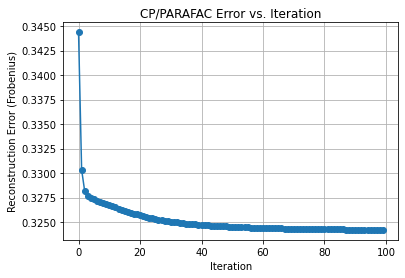

Final absolute error:  0.324192
Final relative error:  0.075135
Final reconstructed tensor:
[[[0.26780984 0.59392792 0.6127124  0.53252856 0.2991515 ]
  [0.4251025  0.5285057  0.59425965 0.55984108 0.36932747]
  [0.03830725 0.92807915 1.00954858 0.34021114 0.16237166]
  [0.21231433 0.49039323 0.57127167 0.29444322 0.19973136]]

 [[0.63375507 0.16390684 0.26094086 0.51963981 0.42618951]
  [0.48949958 0.20305535 0.23148811 0.53724704 0.37364504]
  [0.96989049 0.24044107 0.28702449 1.00258598 0.71400867]
  [0.45018948 0.17751668 0.16106076 0.57829608 0.36848422]]

 [[0.10047504 0.55481446 0.25451348 1.0096744  0.37133265]
  [0.62209122 0.33220418 0.44933337 0.55147315 0.43896342]
  [0.88439862 0.49708649 0.68782095 0.74608606 0.61385118]
  [0.86487587 0.15450797 0.53094461 0.16492494 0.41486026]]]


In [198]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from tensorly.cp_tensor import cp_to_tensor
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate a sample 3x3x3 tensor
I, J, K = 3, 4, 5
tensor = tl.tensor(np.random.rand(I, J, K))

# Decompose with CP and get error at each iteration
rank = 3
cp_tensor, errors = parafac(
    tensor,
    rank=rank,
    n_iter_max=100,
    init='svd',
    tol=1e-8,
    return_errors=True
)

# cp_tensor is (weights, factors)
weights, factors = cp_tensor

# --- Plot the error across iterations ---
plt.plot(errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error (Frobenius)')
plt.title('CP/PARAFAC Error vs. Iteration')
plt.grid(True)
plt.show()

# --- Print the final absolute and relative errors ---
final_abs_error = errors[-1]
final_rel_error = final_abs_error / tl.norm(tensor)

print(f'Final absolute error:  {final_abs_error:.6f}')
print(f'Final relative error:  {final_rel_error:.6f}')

# Wrong reconstruction – ignoring 'weights':
reconstructed_tensor = cp_to_tensor((np.ones_like(weights), factors))

print("Final reconstructed tensor:")
print(reconstructed_tensor)


In [199]:
tl.norm(tensor - reconstructed_tensor)

1.3988175701590626

In [194]:
"""cp_tensor, errors = parafac(tensor, rank=rank, return_errors=True)
# cp_tensor = (weights, factors)
reconstructed_tensor = cp_to_tensor(cp_tensor)

# The final error from TensorLy’s internal tracking:
final_error_reported = errors[-1]

# Manually compute the Frobenius norm difference:
import tensorly as tl
final_error_manual = tl.norm(tensor - reconstructed_tensor)

print(final_error_reported, final_error_manual)
"""

'cp_tensor, errors = parafac(tensor, rank=rank, return_errors=True)\n# cp_tensor = (weights, factors)\nreconstructed_tensor = cp_to_tensor(cp_tensor)\n\n# The final error from TensorLy’s internal tracking:\nfinal_error_reported = errors[-1]\n\n# Manually compute the Frobenius norm difference:\nimport tensorly as tl\nfinal_error_manual = tl.norm(tensor - reconstructed_tensor)\n\nprint(final_error_reported, final_error_manual)\n'